<a href="https://colab.research.google.com/github/Shayee0778/Hamoye-Model-Maker/blob/main/Model_makers_Premiere_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drought Data Analysis By Team ModelMakers

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
 </ul>

Topic - Comparative analyses of severity and impacts of drought in African countries since the beginning of the 21st century

Drought occurs as a result of little or no rainfall over a certain period of time in a particular area. It is a recurring and pervasive environmental challenge that affects numerous African countries. As the 21st century progresses, understanding the evolving patterns of drought and its consequences has become increasingly important. This comparative analysis seeks to provide insights into the distribution, severity, and impacts of drought in African nations during the 21st century. By examining available data, we aim to shed light on the changing dynamics of drought and the measures taken to address its effects.

In [245]:
 #import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
#Load the dataset
df= pd.read_excel('/content/drive/MyDrive/public_emdat_custom_request.xlsx')
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,60.503579,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-9309-MDG,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,MDG,...,NaN,NaN,NaN,NaN,NaN,NaN,58.840648,"[{""adm2_code"":154509,""adm2_name"":""Ambatondraza...",2008-01-03,2023-09-25
4,2001-9044-BFA,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,BFA,...,NaN,NaN,NaN,NaN,NaN,NaN,60.503579,"[{""adm1_code"":40286,""adm1_name"":""Plateau Centr...",2006-10-26,2023-09-25


# New section

In [248]:
#check shape of dataset
df.shape

(168, 46)

In [249]:
#check for the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     168 non-null    object 
 1   Historic                                   168 non-null    object 
 2   Classification Key                         168 non-null    object 
 3   Disaster Group                             168 non-null    object 
 4   Disaster Subgroup                          168 non-null    object 
 5   Disaster Type                              168 non-null    object 
 6   Disaster Subtype                           168 non-null    object 
 7   External IDs                               57 non-null     object 
 8   Event Name                                 0 non-null      float64
 9   ISO                                        168 non-null    object 
 10  Country                   

In [250]:
#check for the data description
df.describe()

,Event Name,AID Contribution ('000 US$),Magnitude,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,...,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
count,0.0,6.000000,4.0,0.0,0.0,0.0,168.000000,133.000000,1.0,168.000000,...,1.560000e+02,0.0,1.560000e+02,0.0,0.0,0.0,0.0,1.100000e+01,1.100000e+01,168.000000
mean,NaN,20172.000000,225.0,NaN,NaN,NaN,2011.327381,5.451128,1.0,2012.083333,...,2.655667e+06,NaN,2.655667e+06,NaN,NaN,NaN,NaN,5.032727e+05,5.869705e+05,77.019948
std,NaN,39798.725271,450.0,NaN,NaN,NaN,6.976004,3.570642,NaN,7.025545,...,3.911632e+06,NaN,3.911632e+06,NaN,NaN,NaN,NaN,4.911607e+05,5.847477e+05,11.666006
min,NaN,417.000000,0.0,NaN,NaN,NaN,2000.000000,1.000000,1.0,2000.000000,...,1.200000e+04,NaN,1.200000e+04,NaN,NaN,NaN,NaN,4.400000e+04,5.432900e+04,58.840648
25%,NaN,704.000000,0.0,NaN,NaN,NaN,2005.000000,2.000000,1.0,2006.000000,...,5.135000e+05,NaN,5.135000e+05,NaN,NaN,NaN,NaN,9.950000e+04,1.174685e+05,66.731058
50%,NaN,2178.000000,0.0,NaN,NaN,NaN,2011.000000,5.000000,1.0,2012.000000,...,1.425000e+06,NaN,1.425000e+06,NaN,NaN,NaN,NaN,2.500000e+05,3.086850e+05,76.861595
75%,NaN,12138.250000,225.0,NaN,NaN,NaN,2017.000000,8.000000,1.0,2018.250000,...,3.325000e+06,NaN,3.325000e+06,NaN,NaN,NaN,NaN,8.165000e+05,8.562340e+05,83.757255
max,NaN,100588.000000,900.0,NaN,NaN,NaN,2022.000000,12.000000,1.0,2023.000000,...,2.597281e+07,NaN,2.597281e+07,NaN,NaN,NaN,NaN,1.400000e+06,1.728639e+06,100.000000


In [251]:
#check for null values
df.isnull().sum()

DisNo.                                         0
Historic                                       0
Classification Key                             0
Disaster Group                                 0
Disaster Subgroup                              0
Disaster Type                                  0
Disaster Subtype                               0
External IDs                                 111
Event Name                                   168
ISO                                            0
Country                                        0
Subregion                                      0
Region                                         0
Location                                      17
Origin                                       100
Associated Types                              47
OFDA Response                                  0
Appeal                                         0
Declaration                                    0
AID Contribution ('000 US$)                  162
Magnitude           

In [252]:
#dropping all completely empty columns
df= df.dropna(axis='columns', how='all')
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,ISO,Country,...,End Day,Total Deaths,No. Affected,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,DJI,Djibouti,...,NaN,NaN,100000.0,100000.0,NaN,NaN,60.503579,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,SDN,Sudan,...,NaN,NaN,2000000.0,2000000.0,NaN,NaN,58.840648,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,SOM,Somalia,...,NaN,21.0,1200000.0,1200000.0,NaN,NaN,58.840648,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-9309-MDG,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,MDG,Madagascar,...,NaN,NaN,231290.0,231290.0,NaN,NaN,58.840648,"[{""adm2_code"":154509,""adm2_name"":""Ambatondraza...",2008-01-03,2023-09-25
4,2001-9044-BFA,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,BFA,Burkina Faso,...,NaN,NaN,NaN,NaN,NaN,NaN,60.503579,"[{""adm1_code"":40286,""adm1_name"":""Plateau Centr...",2006-10-26,2023-09-25


In [253]:
#checking null values
df.isnull().sum()

DisNo.                                 0
Historic                               0
Classification Key                     0
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                       0
External IDs                         111
ISO                                    0
Country                                0
Subregion                              0
Region                                 0
Location                              17
Origin                               100
Associated Types                      47
OFDA Response                          0
Appeal                                 0
Declaration                            0
AID Contribution ('000 US$)          162
Magnitude                            164
Magnitude Scale                        0
Start Year                             0
Start Month                           35
Start Day                            167
End Year        

In [254]:
#checking duplicate values
df.duplicated().sum()

0

In [255]:
#removing other insignificant columns with large null values, columns with only one unique value and high missing values
cols_to_drop = ['DisNo.', 'Classification Key',  "Magnitude", "AID Contribution ('000 US$)","End Day", "Start Day","External IDs",
                 "AID Contribution ('000 US$)",'Start Day','Historic','Disaster Group',
                'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Region', 'Magnitude Scale', 'Admin Units',	'Entry Date',	'Last Update', 'No. Affected']
df.drop(columns=cols_to_drop, axis=1, inplace=True)
df.columns

Index(['ISO', 'Country', 'Subregion', 'Location', 'Origin', 'Associated Types',
       'OFDA Response', 'Appeal', 'Declaration', 'Start Year', 'Start Month',
       'End Year', 'End Month', 'Total Deaths', 'Total Affected',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI'],
      dtype='object')

In [256]:
#checking the null values
df.isnull().sum().sort_values()

ISO                                    0
End Year                               0
Start Year                             0
Appeal                                 0
OFDA Response                          0
Declaration                            0
Subregion                              0
Country                                0
CPI                                    0
Total Affected                        12
Location                              17
Start Month                           35
Associated Types                      47
End Month                             66
Origin                               100
Total Deaths                         155
Total Damage, Adjusted ('000 US$)    157
Total Damage ('000 US$)              157
dtype: int64

In [257]:
#checking the columns data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ISO                                168 non-null    object 
 1   Country                            168 non-null    object 
 2   Subregion                          168 non-null    object 
 3   Location                           151 non-null    object 
 4   Origin                             68 non-null     object 
 5   Associated Types                   121 non-null    object 
 6   OFDA Response                      168 non-null    object 
 7   Appeal                             168 non-null    object 
 8   Declaration                        168 non-null    object 
 9   Start Year                         168 non-null    int64  
 10  Start Month                        133 non-null    float64
 11  End Year                           168 non-null    int64  

In [258]:
#Rechecking empty rows
df.isnull().sum()

ISO                                    0
Country                                0
Subregion                              0
Location                              17
Origin                               100
Associated Types                      47
OFDA Response                          0
Appeal                                 0
Declaration                            0
Start Year                             0
Start Month                           35
End Year                               0
End Month                             66
Total Deaths                         155
Total Affected                        12
Total Damage ('000 US$)              157
Total Damage, Adjusted ('000 US$)    157
CPI                                    0
dtype: int64

In [259]:
#Fill empty rows with 0(zero) for the specified columns to indicate that the month number was not specified
columns_to_fill = ['Start Month', 'End Month']
for column_name in columns_to_fill:
    df.loc[df[column_name].isna(), column_name] = 0
df.head()

,ISO,Country,Subregion,Location,Origin,Associated Types,OFDA Response,Appeal,Declaration,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,DJI,Djibouti,Sub-Saharan Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",NaN,NaN,Yes,No,No,2001,6.0,2001,0.0,NaN,100000.0,NaN,NaN,60.503579
1,SDN,Sudan,Northern Africa,"Northern Darfur, Northern Kordofan, Red Sea pr...",NaN,Food shortage|Water shortage,No,No,No,2000,1.0,2001,0.0,NaN,2000000.0,NaN,NaN,58.840648
2,SOM,Somalia,Sub-Saharan Africa,"Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...",NaN,Food shortage,No,No,No,2000,1.0,2001,0.0,21.0,1200000.0,NaN,NaN,58.840648
3,MDG,Madagascar,Sub-Saharan Africa,"Ambovombe-Androy, Bekily, Beloha, Tsihombe dis...",NaN,NaN,No,No,No,2000,6.0,2000,0.0,NaN,231290.0,NaN,NaN,58.840648
4,BFA,Burkina Faso,Sub-Saharan Africa,Plateau Central province,NaN,NaN,No,No,No,2001,4.0,2001,0.0,NaN,NaN,NaN,NaN,60.503579


In [260]:
#Rechecking empty rows
df.isnull().sum()

ISO                                    0
Country                                0
Subregion                              0
Location                              17
Origin                               100
Associated Types                      47
OFDA Response                          0
Appeal                                 0
Declaration                            0
Start Year                             0
Start Month                            0
End Year                               0
End Month                              0
Total Deaths                         155
Total Affected                        12
Total Damage ('000 US$)              157
Total Damage, Adjusted ('000 US$)    157
CPI                                    0
dtype: int64

In [261]:
#Fill empty rows with 'not specified' for the columns with object data type
columns_to_fill = ['Origin', 'Location','Associated Types']
for column_name in columns_to_fill:
    df.loc[df[column_name].isna(), column_name] = 'Not specified'
df.head()

,ISO,Country,Subregion,Location,Origin,Associated Types,OFDA Response,Appeal,Declaration,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,DJI,Djibouti,Sub-Saharan Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",Not specified,Not specified,Yes,No,No,2001,6.0,2001,0.0,NaN,100000.0,NaN,NaN,60.503579
1,SDN,Sudan,Northern Africa,"Northern Darfur, Northern Kordofan, Red Sea pr...",Not specified,Food shortage|Water shortage,No,No,No,2000,1.0,2001,0.0,NaN,2000000.0,NaN,NaN,58.840648
2,SOM,Somalia,Sub-Saharan Africa,"Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...",Not specified,Food shortage,No,No,No,2000,1.0,2001,0.0,21.0,1200000.0,NaN,NaN,58.840648
3,MDG,Madagascar,Sub-Saharan Africa,"Ambovombe-Androy, Bekily, Beloha, Tsihombe dis...",Not specified,Not specified,No,No,No,2000,6.0,2000,0.0,NaN,231290.0,NaN,NaN,58.840648
4,BFA,Burkina Faso,Sub-Saharan Africa,Plateau Central province,Not specified,Not specified,No,No,No,2001,4.0,2001,0.0,NaN,NaN,NaN,NaN,60.503579


In [262]:
#Rechecking empty rows
df.isnull().sum()

ISO                                    0
Country                                0
Subregion                              0
Location                               0
Origin                                 0
Associated Types                       0
OFDA Response                          0
Appeal                                 0
Declaration                            0
Start Year                             0
Start Month                            0
End Year                               0
End Month                              0
Total Deaths                         155
Total Affected                        12
Total Damage ('000 US$)              157
Total Damage, Adjusted ('000 US$)    157
CPI                                    0
dtype: int64

In [263]:

# Change data types
type_dict = { #"Total Affected" : "int64",
             "Country": 'category',
             "Subregion": "category",
             "Origin": "category",
             "OFDA Response": "category",
             "Appeal": "category",
             "Declaration": "category",
             'Start Year': 'category',
             'End Year': 'category'
}

for key, value in type_dict.items():
  df[key] = df[key].astype(value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   ISO                                168 non-null    object  
 1   Country                            168 non-null    category
 2   Subregion                          168 non-null    category
 3   Location                           168 non-null    object  
 4   Origin                             168 non-null    category
 5   Associated Types                   168 non-null    object  
 6   OFDA Response                      168 non-null    category
 7   Appeal                             168 non-null    category
 8   Declaration                        168 non-null    category
 9   Start Year                         168 non-null    category
 10  Start Month                        168 non-null    float64 
 11  End Year                           168 non-nu

In [264]:
#"Total Affected" : "int64"

df['Total Affected'] = pd.to_numeric(df['Total Affected'], errors='coerce').fillna(0).astype(int)

In [265]:
# Import the UNICEF regional data
regions_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/JME_Regional-Classifications.xlsx")[['ISO Code', 'UN Sub Region', 'World Bank Income Groups Combined']]
regions_df.head()

,ISO Code,UN Sub Region,World Bank Income Groups Combined
0,AFG,Southern Asia,Low Income
1,ALB,Southern Europe,Middle Income
2,DZA,Northern Africa,Middle Income
3,AND,Southern Europe,High Income
4,AGO,Middle Africa,Middle Income


In [266]:
# merge the regions data with the original table
df = pd.merge(left=df, right=regions_df, left_on = 'ISO', right_on = 'ISO Code', how='left')
df = df.drop(columns=['ISO Code'])
df

,ISO,Country,Subregion,Location,Origin,Associated Types,OFDA Response,Appeal,Declaration,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,UN Sub Region,World Bank Income Groups Combined
0,DJI,Djibouti,Sub-Saharan Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",Not specified,Not specified,Yes,No,No,2001,6.0,2001,0.0,NaN,100000,NaN,NaN,60.503579,Eastern Africa,Middle Income
1,SDN,Sudan,Northern Africa,"Northern Darfur, Northern Kordofan, Red Sea pr...",Not specified,Food shortage|Water shortage,No,No,No,2000,1.0,2001,0.0,NaN,2000000,NaN,NaN,58.840648,Northern Africa,Middle Income
2,SOM,Somalia,Sub-Saharan Africa,"Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...",Not specified,Food shortage,No,No,No,2000,1.0,2001,0.0,21.0,1200000,NaN,NaN,58.840648,Eastern Africa,Low Income
3,MDG,Madagascar,Sub-Saharan Africa,"Ambovombe-Androy, Bekily, Beloha, Tsihombe dis...",Not specified,Not specified,No,No,No,2000,6.0,2000,0.0,NaN,231290,NaN,NaN,58.840648,Eastern Africa,Low Income
4,BFA,Burkina Faso,Sub-Saharan Africa,Plateau Central province,Not specified,Not specified,No,No,No,2001,4.0,2001,0.0,NaN,0,NaN,NaN,60.503579,Western Africa,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,COD,Democratic Republic of the Congo,Sub-Saharan Africa,Not specified,Not specified,Not specified,No,No,No,2022,0.0,2022,11.0,NaN,25972806,NaN,NaN,100.000000,Middle Africa,Low Income
164,MWI,Malawi,Sub-Saharan Africa,Not specified,Not specified,Not specified,No,No,No,2022,0.0,2022,11.0,NaN,2678193,NaN,NaN,100.000000,Eastern Africa,Low Income
165,MLI,Mali,Sub-Saharan Africa,Not specified,Not specified,Not specified,No,No,No,2022,0.0,2022,11.0,NaN,1735753,NaN,NaN,100.000000,Western Africa,Low Income
166,NGA,Nigeria,Sub-Saharan Africa,Not specified,Not specified,Not specified,No,No,No,2022,0.0,2022,11.0,NaN,19110398,NaN,NaN,100.000000,Western Africa,Middle Income


In [267]:
# Rename column
df = df.rename(columns={
    "World Bank Income Groups Combined": "Income group"
})
# Export cleaned data
#df.to_csv('drought_data_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Research Questions

the dataset contains information on the occurence of drought in africa. This analysis aims to answer the following:

### 1. who were the worst hit? what is their distribution per:

- country
- region
- income group

### 2. what are the effects of drought?
- direct
- secondary

In [268]:
df.head(1)

,ISO,Country,Subregion,Location,Origin,Associated Types,OFDA Response,Appeal,Declaration,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,UN Sub Region,Income group
0,DJI,Djibouti,Sub-Saharan Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",Not specified,Not specified,Yes,No,No,2001,6.0,2001,0.0,NaN,100000,NaN,NaN,60.503579,Eastern Africa,Middle Income


In [269]:
map_df = df.groupby('Country').sum().reset_index()
map_df
# ['Total Affected'].describe()

,Country,Start Month,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,Angola,30.0,13.0,58.0,4922216,0.0,0.0,375.689917
1,Botswana,7.0,24.0,0.0,38000,44000.0,54329.0,168.346586
2,Burkina Faso,21.0,17.0,0.0,13250928,0.0,0.0,406.693439
3,Burundi,31.0,4.0,120.0,2412500,0.0,0.0,353.327035
4,Cabo Verde,17.0,16.0,0.0,146093,0.0,0.0,245.220443
5,Cameroon,10.0,28.0,0.0,2401127,0.0,0.0,305.686751
6,Central African Republic,0.0,11.0,0.0,2221692,0.0,0.0,100.000000
7,Chad,28.0,22.0,0.0,8822162,0.0,0.0,396.020124
8,Democratic Republic of the Congo,0.0,11.0,0.0,25972806,0.0,0.0,100.000000
9,Djibouti,35.0,19.0,0.0,1025176,0.0,0.0,446.161619


**UNIVARIATE**

In [270]:

# px.boxplot(data_frame=map_df2, column'Total Affected')
px.box(data_frame=map_df, x='Total Affected')
# px.box(map_df, y='ISO', x='Total Affected', range_x = [10000000, 30000000])

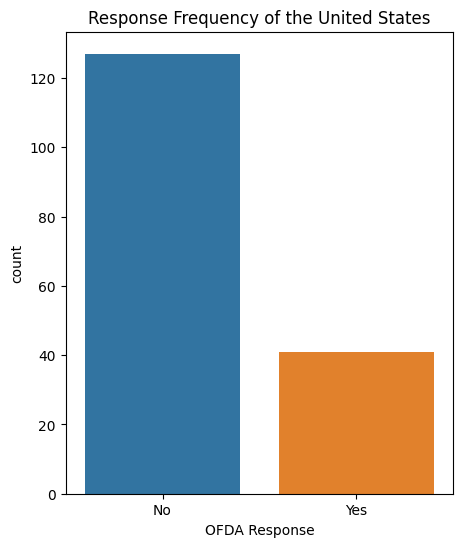

In [271]:
plt.figure(figsize=(5, 6))
sns.countplot(data=df, x="OFDA Response")
plt.title('Response Frequency of the United States')
plt.xlabel("OFDA Response")
plt.show()

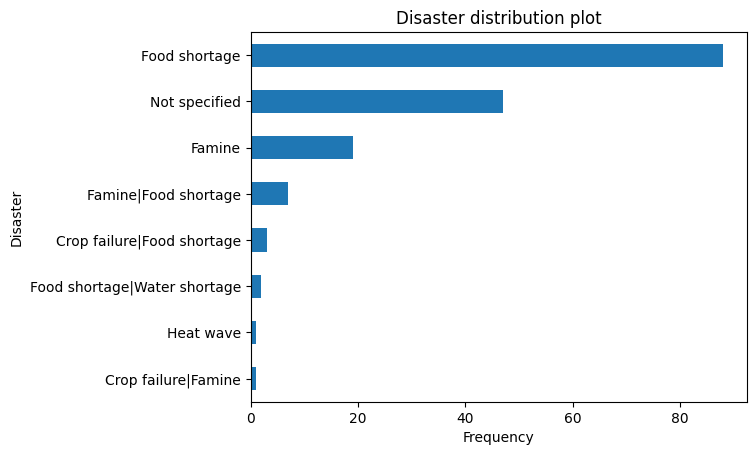

In [272]:
#countplot to show the Frequecy of disaster
df['Associated Types'].value_counts().sort_values().plot(kind='barh')
plt.title('Disaster distribution plot')
plt.xlabel('Frequency')
plt.ylabel('Disaster')
plt.show()
#It can be observed that the most occuring disaster is Food Shortage, followed by Famine;  It cane be observed that most of drought that happended in Nigeria was as a
#result of food shortage or Famine


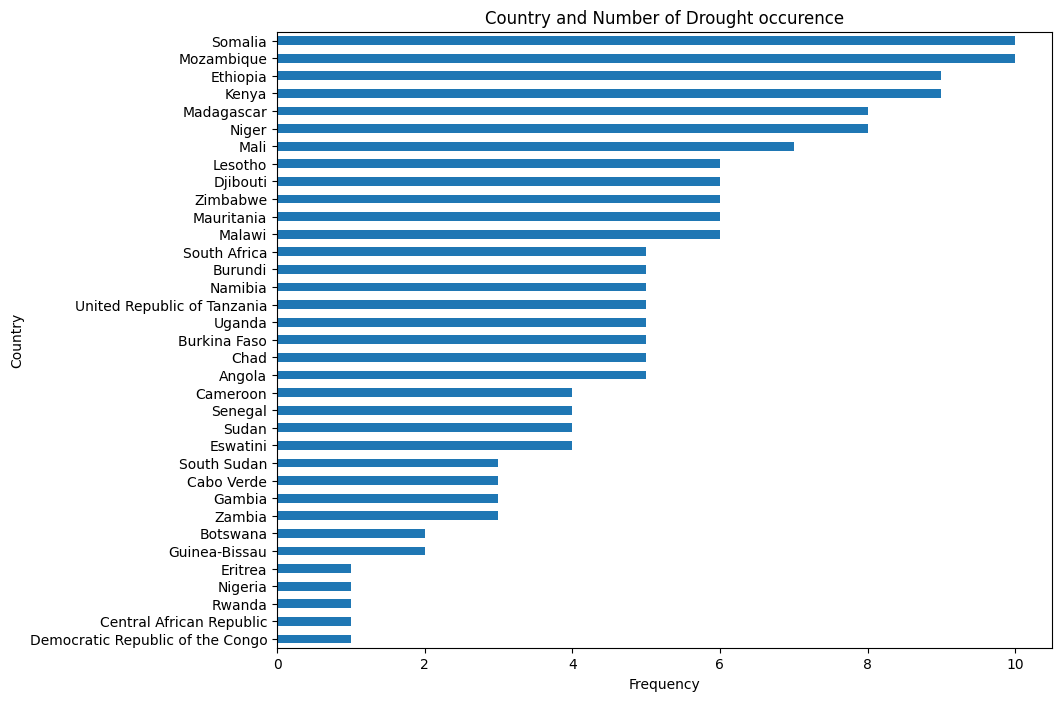

In [273]:
plt.figure(figsize=(10,8))
df['Country'].value_counts().sort_values().plot(kind='barh')
plt.title('Country and Number of Drought occurence')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

#Somalia and Mozambique have expereiecnced more drought than any other country in Africa since 2000

In [274]:
df[df['Start Year'] == 2022]

,ISO,Country,Subregion,Location,Origin,Associated Types,OFDA Response,Appeal,Declaration,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,UN Sub Region,Income group
154,ETH,Ethiopia,Sub-Saharan Africa,Somali region and Oromia (Boran and Moyale zon...,La NIna,Not specified,No,No,No,2022,0.0,2023,2.0,NaN,24100000,640000.0,640000.0,100.0,Eastern Africa,Low Income
155,CPV,Cabo Verde,Sub-Saharan Africa,"Ribeira Grande de Santiago, Santa Cruz, Sao Do...",Not specified,Food shortage,No,No,Yes,2022,0.0,2022,4.0,NaN,46093,NaN,NaN,100.0,Western Africa,Middle Income
156,NER,Niger,Sub-Saharan Africa,"Agadez, Diffa, Tillaberi, Tahoua, Maradi",Not specified,Food shortage,No,No,No,2022,0.0,2022,5.0,NaN,4400000,NaN,NaN,100.0,Western Africa,Low Income
157,TCD,Chad,Sub-Saharan Africa,"Bahr El Gazal (Nord, Ouest, Sud), Batha (Est, ...",Not specified,Food shortage,No,No,Yes,2022,6.0,2022,8.0,NaN,2135362,NaN,NaN,100.0,Middle Africa,Low Income
158,DJI,Djibouti,Sub-Saharan Africa,"Ali Sabieh, Arta, Dikhil, Obock and Tadjoura",Ongoing drought and compounding regional and i...,Food shortage,No,No,No,2022,6.0,2022,7.0,NaN,192168,NaN,NaN,100.0,Eastern Africa,Middle Income
159,UGA,Uganda,Sub-Saharan Africa,"Napak, Kaabong, Kotido, Moroto districts (Kara...",Not specified,Famine,No,No,No,2022,7.0,2022,12.0,2465.0,518000,NaN,NaN,100.0,Eastern Africa,Low Income
160,BFA,Burkina Faso,Sub-Saharan Africa,Not specified,Not specified,Not specified,No,No,No,2022,0.0,2022,11.0,NaN,3500928,NaN,NaN,100.0,Western Africa,Low Income
161,CMR,Cameroon,Sub-Saharan Africa,Not specified,Not specified,Not specified,No,No,No,2022,0.0,2022,11.0,NaN,2389127,NaN,NaN,100.0,Middle Africa,Middle Income
162,CAF,Central African Republic,Sub-Saharan Africa,Not specified,Not specified,Not specified,No,No,No,2022,0.0,2022,11.0,NaN,2221692,NaN,NaN,100.0,Middle Africa,Low Income
163,COD,Democratic Republic of the Congo,Sub-Saharan Africa,Not specified,Not specified,Not specified,No,No,No,2022,0.0,2022,11.0,NaN,25972806,NaN,NaN,100.0,Middle Africa,Low Income


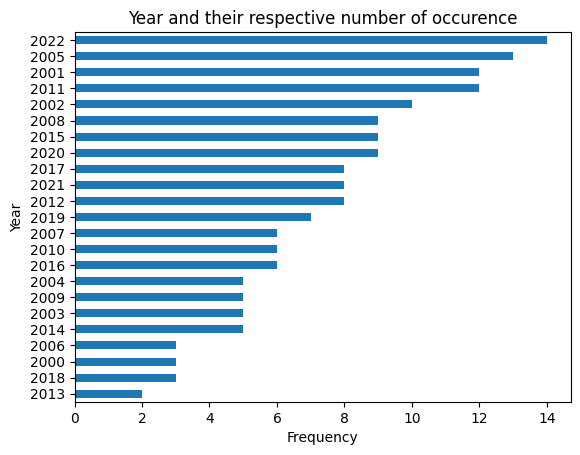

In [275]:
df['Start Year'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Year and their respective number of occurence')
plt.xlabel('Frequency')
plt.ylabel('Year')
plt.show()
#2022 recorded the hihest occurence of drought, followed by 2005 and 2013 being the year with the least recor of drought

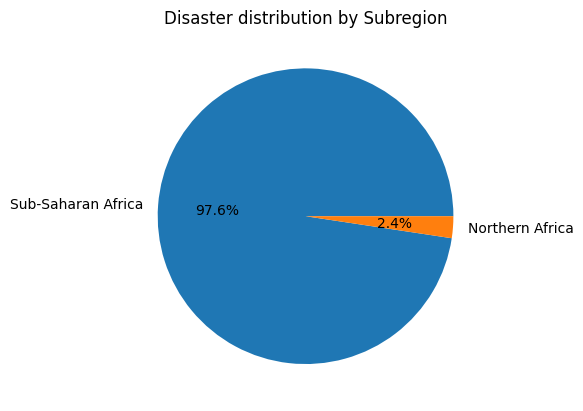

In [276]:
#pie chart for disaster group
x = df['Subregion'].value_counts()
plt.pie(x.values,
		labels=x.index,
		autopct='%1.1f%%')
plt.title('Disaster distribution by Subregion')
plt.show()
#97.6% of drought that happened in Africa has been from Sub-Saharan Africa and Northern Africa having 2.4%

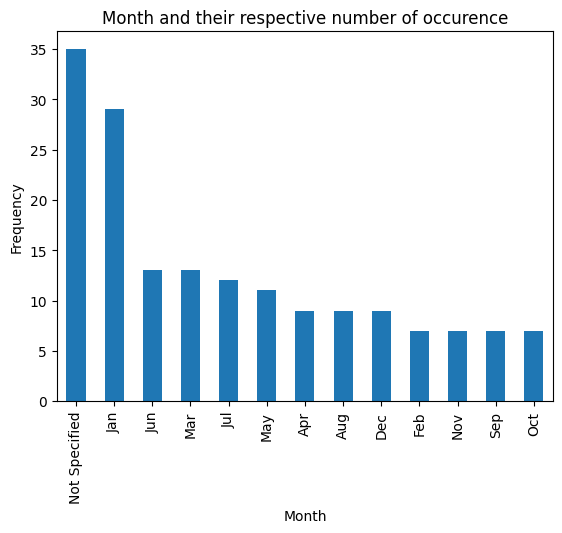

In [277]:

month_dict = {1.0:'Jan', 2.0:'Feb',3.0:'Mar', 4.:'Apr', 5. : 'May', 6.:'Jun', 7.:'Jul', 8. :'Aug',  9.:'Sep', 10. :'Oct', 11. :'Nov', 12.: 'Dec', 0.0:'Not Specified'}
df['Start Month'].replace(month_dict, inplace = True)
df['Start Month'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Month and their respective number of occurence')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()
#Drough occur mostly in the month of Jan (dry season)

**BIVARIATE**

In [278]:
#A table displaying countries and their total affected persons
count_by_country = df.groupby("Country").sum().sort_values(by='Total Affected', ascending=True).reset_index()
count_by_country

,Country,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,Botswana,24.0,0.0,38000,44000.0,54329.0,168.346586
1,Guinea-Bissau,10.0,0.0,132000,0.0,0.0,130.346947
2,Cabo Verde,16.0,0.0,146093,0.0,0.0,245.220443
3,Gambia,12.0,0.0,491100,0.0,0.0,220.903881
4,Rwanda,0.0,0.0,1000000,0.0,0.0,62.858460
5,Djibouti,19.0,0.0,1025176,0.0,0.0,446.161619
6,Eritrea,10.0,0.0,1700000,0.0,0.0,73.568746
7,Senegal,16.0,0.0,2093702,0.0,0.0,305.020433
8,Eswatini,14.0,0.0,2104000,0.0,0.0,300.720709
9,Central African Republic,11.0,0.0,2221692,0.0,0.0,100.000000


In [279]:
#A bar chart displaying countries and their total affected persons in descending order
px.bar(data_frame = count_by_country, x='Total Affected', y='Country' , title= 'Total Affected per Country')

__OBSERVATION__

From the above analysis, the following countries were the most hit in terms of the number of persons affected by drought:
- Ethiopia
- Kenya
- Somalia
- Zimbabwe
- Nigeria.

Interestingly, __top 3 of the top 5 countries most Affected were still eastern African countries.__ Why exactly is Eastern Africa most affected by drought?
Could it be a geographical factor or as a result of poor emergency response on the part of the government?

This question calls for further investigations as our data cannot provide an answer to it!


In [280]:
# How many persons were affected in each subregion for the period under review?
count_by_subregion = df.groupby("UN Sub Region").sum().reset_index()
count_by_subregion

,UN Sub Region,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,Eastern Africa,326.0,23316.0,227248956,3783000.0,4351928.0,6585.467555
1,Middle Africa,85.0,58.0,44340003,0.0,0.0,1277.396792
2,Northern Africa,19.0,0.0,17839300,0.0,0.0,318.281341
3,Southern Africa,115.0,0.0,38461515,1753000.0,2104748.0,1713.639894
4,Western Africa,181.0,0.0,86394334,0.0,0.0,3044.565642


In [281]:
# compute percentages for each subregion
count_by_subregion['Percentage'] = (count_by_subregion['Total Affected'] / sum(count_by_subregion['Total Affected'])) * 100
count_by_subregion

,UN Sub Region,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Percentage
0,Eastern Africa,326.0,23316.0,227248956,3783000.0,4351928.0,6585.467555,54.853409
1,Middle Africa,85.0,58.0,44340003,0.0,0.0,1277.396792,10.702801
2,Northern Africa,19.0,0.0,17839300,0.0,0.0,318.281341,4.306055
3,Southern Africa,115.0,0.0,38461515,1753000.0,2104748.0,1713.639894,9.283850
4,Western Africa,181.0,0.0,86394334,0.0,0.0,3044.565642,20.853886


In [282]:
px.pie(data_frame=count_by_subregion, values='Total Affected', names = "UN Sub Region", title="Number of persons affected per UN Subregion")

__OBSERVATION__:
The visual above shows that __54.9%__ of person affected come from eastern africa. This means that one in every two persons affected by drought in africa is from eastern africa.

In [283]:
count_by_country = df.groupby("Country").sum().sort_values(by='Total Affected').reset_index()
count_by_country

,Country,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,Botswana,24.0,0.0,38000,44000.0,54329.0,168.346586
1,Guinea-Bissau,10.0,0.0,132000,0.0,0.0,130.346947
2,Cabo Verde,16.0,0.0,146093,0.0,0.0,245.220443
3,Gambia,12.0,0.0,491100,0.0,0.0,220.903881
4,Rwanda,0.0,0.0,1000000,0.0,0.0,62.858460
5,Djibouti,19.0,0.0,1025176,0.0,0.0,446.161619
6,Eritrea,10.0,0.0,1700000,0.0,0.0,73.568746
7,Senegal,16.0,0.0,2093702,0.0,0.0,305.020433
8,Eswatini,14.0,0.0,2104000,0.0,0.0,300.720709
9,Central African Republic,11.0,0.0,2221692,0.0,0.0,100.000000


In [284]:
# Create a temporary dataframe containing some columns of our main dataframe
# so that we can join them to the aggregated dataframe for the map

temp_df = df[['Country', 'UN Sub Region', 'Income group', 'ISO']]
temp_df = temp_df.drop_duplicates()
temp_df

,Country,UN Sub Region,Income group,ISO
0,Djibouti,Eastern Africa,Middle Income,DJI
1,Sudan,Northern Africa,Middle Income,SDN
2,Somalia,Eastern Africa,Low Income,SOM
3,Madagascar,Eastern Africa,Low Income,MDG
4,Burkina Faso,Western Africa,Low Income,BFA
5,Mali,Western Africa,Low Income,MLI
6,Niger,Western Africa,Low Income,NER
7,Chad,Middle Africa,Low Income,TCD
8,Mozambique,Eastern Africa,Low Income,MOZ
9,Cameroon,Middle Africa,Middle Income,CMR


In [285]:
# Now, we can join our temp_df with the map_df dataframe using the "Country" common column:
map_df = pd.merge(left=map_df, right=temp_df, on="Country", how='left')
map_df

,Country,Start Month,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,UN Sub Region,Income group,ISO
0,Angola,30.0,13.0,58.0,4922216,0.0,0.0,375.689917,Middle Africa,Middle Income,AGO
1,Botswana,7.0,24.0,0.0,38000,44000.0,54329.0,168.346586,Southern Africa,Middle Income,BWA
2,Burkina Faso,21.0,17.0,0.0,13250928,0.0,0.0,406.693439,Western Africa,Low Income,BFA
3,Burundi,31.0,4.0,120.0,2412500,0.0,0.0,353.327035,Eastern Africa,Low Income,BDI
4,Cabo Verde,17.0,16.0,0.0,146093,0.0,0.0,245.220443,Western Africa,Middle Income,CPV
5,Cameroon,10.0,28.0,0.0,2401127,0.0,0.0,305.686751,Middle Africa,Middle Income,CMR
6,Central African Republic,0.0,11.0,0.0,2221692,0.0,0.0,100.000000,Middle Africa,Low Income,CAF
7,Chad,28.0,22.0,0.0,8822162,0.0,0.0,396.020124,Middle Africa,Low Income,TCD
8,Democratic Republic of the Congo,0.0,11.0,0.0,25972806,0.0,0.0,100.000000,Middle Africa,Low Income,COD
9,Djibouti,35.0,19.0,0.0,1025176,0.0,0.0,446.161619,Eastern Africa,Middle Income,DJI


Now, we have the aggregated table containing other values that we can use for our map.
Next, let's group the "Total Affected" column into intervals reflecting the severity of occurence:

In [286]:
# Split the "Total Affected" column into intervals
bin_edges = [0, 5000000, 15000000, 30000000, map_df["Total Affected"].max()]
bin_labels = ["Low Severity (0-5M)", "Moderate Severity (>5M - 15M)", "High Severity (>15M - 30M)", "Critical Severity (>30M)"]
map_df["Severity Level"] = pd.cut(x=map_df["Total Affected"], bins=bin_edges, labels=bin_labels, right=True)
map_df.head(1)

,Country,Start Month,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,UN Sub Region,Income group,ISO,Severity Level
0,Angola,30.0,13.0,58.0,4922216,0.0,0.0,375.689917,Middle Africa,Middle Income,AGO,Low Severity (0-5M)


In [287]:
#create a map that shiows the level of severity per region
color_discrete_map = {
    "Critical Severity (>30M)": "#A70100",
    "High Severity (>15M - 30M)": "#D93F00",
    "Moderate Severity (>5M - 15M)": "#FD8E2A",
    "Low Severity (0-5M)": "#FFD983"
}

map_plot = px.choropleth(data_frame=map_df, locations="ISO", locationmode="ISO-3", scope='africa',
              color='Severity Level', color_discrete_map=color_discrete_map,
             hover_data=map_df[["Severity Level", "Total Affected", "Income group", "UN Sub Region"]],
             height=600, width=800)

# update layout
map_plot.update_layout(title="Drought Severity Level by Country",
                      margin={"r":0, "t":40, "l":0, "b":0})
map_plot.show()

In [288]:
#group datadframe by inccime group
count_by_income = df.groupby("Income group").sum().reset_index()
count_by_income

,Income group,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,Low Income,414.0,23205.0,288212909,3533000.0,4069237.0,8020.860536
1,Middle Income,312.0,169.0,126071199,2003000.0,2387439.0,4918.490689


In [289]:
#check the total affected by the country income
count_by_income['Percentage'] = (count_by_income['Total Affected'] / sum(count_by_income['Total Affected'])) * 100
count_by_income

,Income group,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Percentage
0,Low Income,414.0,23205.0,288212909,3533000.0,4069237.0,8020.860536,69.568903
1,Middle Income,312.0,169.0,126071199,2003000.0,2387439.0,4918.490689,30.431097


In [290]:
px.bar(data_frame = count_by_income, x = "Income group", y = "Total Affected", text="Percentage")

__OBSERVATION__
The bar chart shows that countries with low income were affected more than those in middle income by more than two times! It therefore gives a pointer that the income level of a country most definitely affects the number of persons involved in drought

Line chart showing the number of people affected by forced migration over time

In [291]:
#Group the data by time
df_grouped = df.groupby(['Start Year', 'Total Affected'])

In [292]:
#Calculate the mean number of people affected by forced migration for each time period
df_mean = df_grouped.mean()

In [293]:
df_mean

End Month  Total Deaths  Total Damage ('000 US$)  \
Start Year Total Affected                                                     
2000       0                     NaN           NaN                      NaN   
           12000                 NaN           NaN                      NaN   
           14000                 NaN           NaN                      NaN   
           20000                 NaN           NaN                      NaN   
           25000                 NaN           NaN                      NaN   
...                              ...           ...                      ...   
2022       12600000              NaN           NaN                      NaN   
           15000000              NaN           NaN                      NaN   
           19110398             11.0           NaN                      NaN   
           24100000              2.0           NaN                 640000.0   
           25972806             11.0           NaN                      NaN   

                           Total Damage, Adjusted ('000 US$)    CPI  
Start Year Total Affected                                            
2000       0                                             NaN    NaN  
           12000                                         NaN    NaN  
           14000                                         NaN    NaN  
           20000                                         NaN    NaN  
           25000                                         NaN    NaN  
...                                                      ...    ...  
2022       12600000                                      NaN    NaN  
           15000000                                      NaN    NaN  
           19110398                                      NaN  100.0  
           24100000                                 640000.0  100.0  
           25972806                                      NaN  100.0  

[2921 rows x 5 columns]

In [294]:
#Reset the index
df_mean = df.reset_index()

In [295]:
#Sort the data by time
df_mean = df.sort_values(by='Start Year')

In [296]:
df_mean = df_mean.groupby("Start Year").mean().reset_index()

In [297]:
df_mean

,Start Year,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,2000,0.000000,21.000000,1.143763e+06,NaN,NaN,58.840648
1,2001,0.000000,58.000000,1.046213e+06,NaN,NaN,60.503579
2,2002,0.500000,196.000000,5.943435e+05,NaN,NaN,61.463188
3,2003,0.200000,9.000000,3.123900e+06,NaN,NaN,62.858460
4,2004,0.200000,80.000000,3.555800e+06,NaN,NaN,64.541329
5,2005,3.538462,49.666667,1.593385e+06,NaN,NaN,66.731058
6,2006,4.666667,NaN,1.252333e+06,NaN,NaN,68.883759
7,2007,2.500000,NaN,6.779583e+05,NaN,NaN,70.848793
8,2008,3.888889,4.000000,1.993611e+06,NaN,NaN,73.568746
9,2009,4.000000,NaN,4.196000e+06,NaN,NaN,73.307177


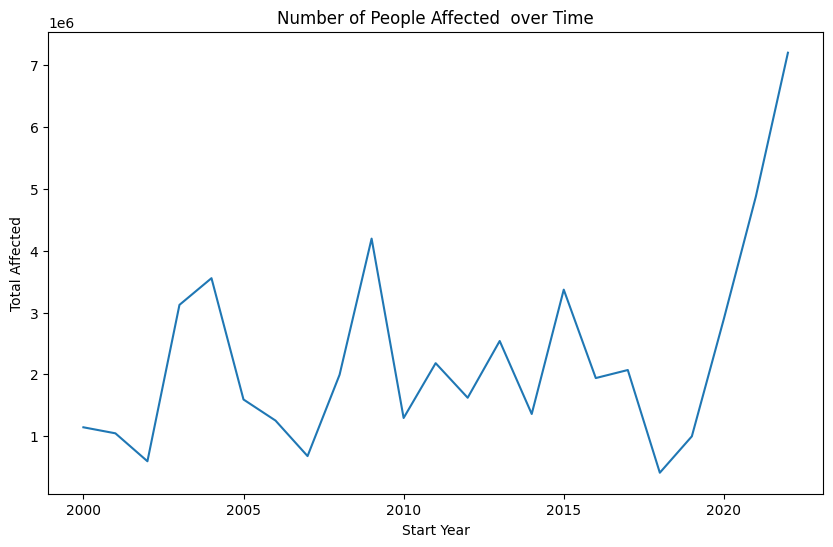

In [298]:
#Create the line chart that shows trend of how drought have affected the number o
plt.figure(figsize=(10, 6))
plt.plot(df_mean['Start Year'], df_mean['Total Affected'])
plt.title('Number of People Affected  over Time')
plt.xlabel('Start Year')
plt.ylabel('Total Affected')
plt.show()

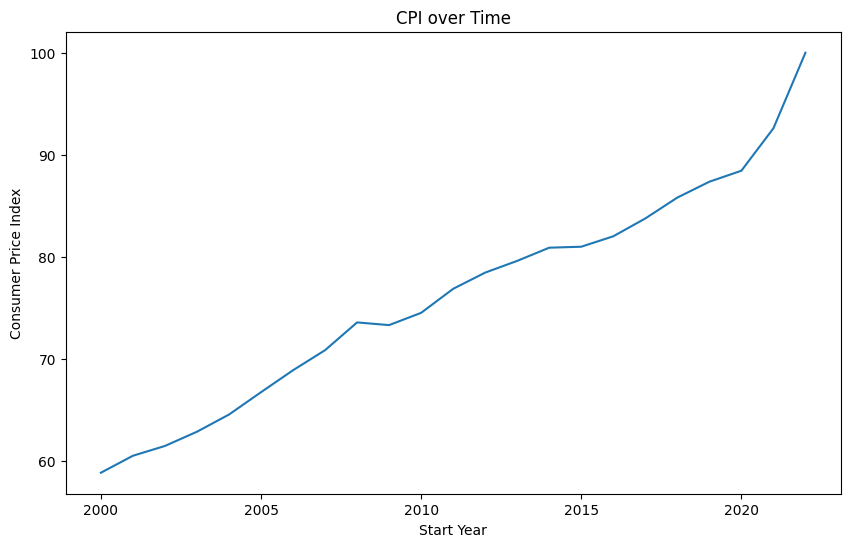

In [299]:
plt.figure(figsize=(10, 6))
plt.plot(df_mean['Start Year'], df_mean['CPI'])
plt.title('CPI over Time')
plt.xlabel('Start Year')
plt.ylabel('Consumer Price Index')
plt.show()

In [300]:
df.head()

,ISO,Country,Subregion,Location,Origin,Associated Types,OFDA Response,Appeal,Declaration,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,UN Sub Region,Income group
0,DJI,Djibouti,Sub-Saharan Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",Not specified,Not specified,Yes,No,No,2001,Jun,2001,0.0,NaN,100000,NaN,NaN,60.503579,Eastern Africa,Middle Income
1,SDN,Sudan,Northern Africa,"Northern Darfur, Northern Kordofan, Red Sea pr...",Not specified,Food shortage|Water shortage,No,No,No,2000,Jan,2001,0.0,NaN,2000000,NaN,NaN,58.840648,Northern Africa,Middle Income
2,SOM,Somalia,Sub-Saharan Africa,"Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...",Not specified,Food shortage,No,No,No,2000,Jan,2001,0.0,21.0,1200000,NaN,NaN,58.840648,Eastern Africa,Low Income
3,MDG,Madagascar,Sub-Saharan Africa,"Ambovombe-Androy, Bekily, Beloha, Tsihombe dis...",Not specified,Not specified,No,No,No,2000,Jun,2000,0.0,NaN,231290,NaN,NaN,58.840648,Eastern Africa,Low Income
4,BFA,Burkina Faso,Sub-Saharan Africa,Plateau Central province,Not specified,Not specified,No,No,No,2001,Apr,2001,0.0,NaN,0,NaN,NaN,60.503579,Western Africa,Low Income


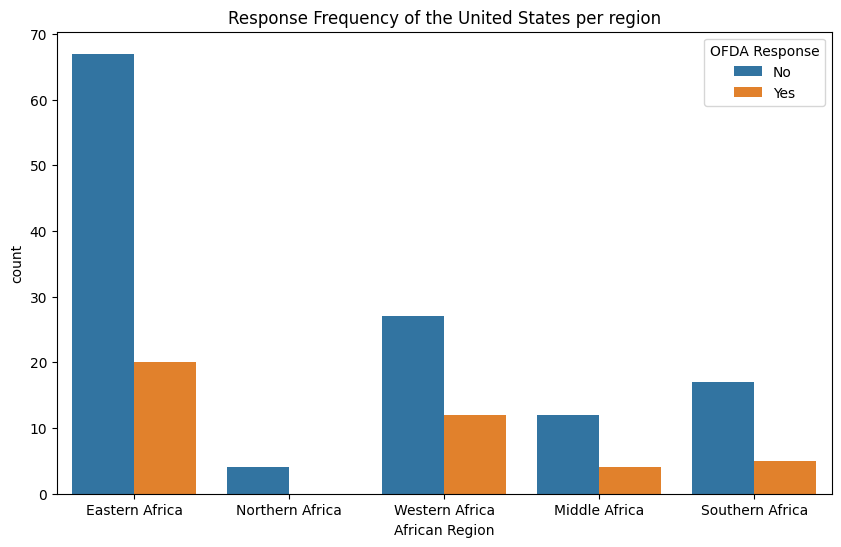

In [301]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="UN Sub Region", hue="OFDA Response")
plt.title('Response Frequency of the United States per region')
plt.xlabel('African Region')
plt.show()

In [302]:
df.head(1)

,ISO,Country,Subregion,Location,Origin,Associated Types,OFDA Response,Appeal,Declaration,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,UN Sub Region,Income group
0,DJI,Djibouti,Sub-Saharan Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",Not specified,Not specified,Yes,No,No,2001,Jun,2001,0.0,NaN,100000,NaN,NaN,60.503579,Eastern Africa,Middle Income


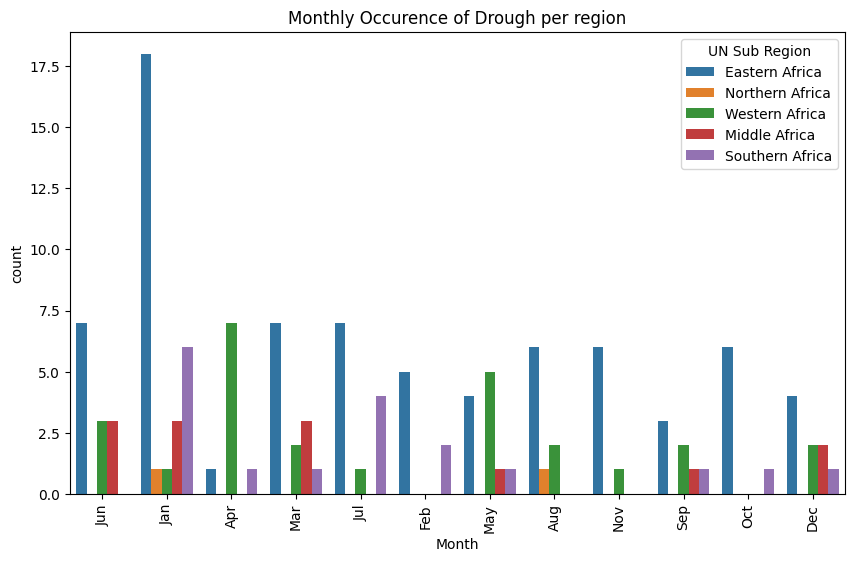

In [303]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Start Month'] != 'Not Specified'], hue="UN Sub Region", x="Start Month")
plt.title('Monthly Occurence of Drough per region')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.show()

In [304]:
df["Appeal"].value_counts()

No     156
Yes     12
Name: Appeal, dtype: int64

In [305]:
df["OFDA Response"].value_counts()

No     127
Yes     41
Name: OFDA Response, dtype: int64

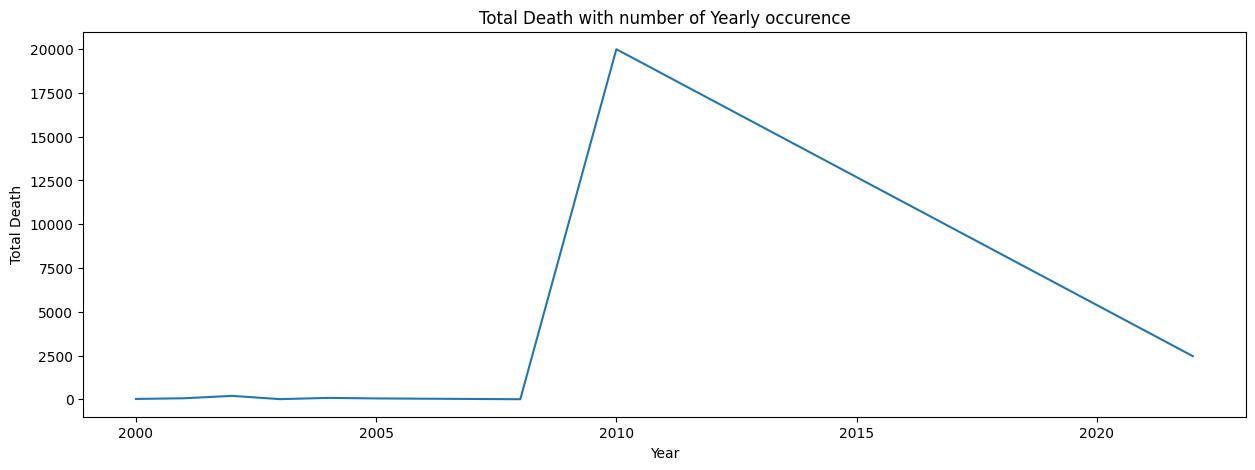

In [306]:
#distribution of death for each year
plt.figure(figsize=(15,5))
#df_copy_ana[['Start Year','Total Deaths']].set_index('Start Year').plot()
sns.lineplot(data=df, x='Start Year', y='Total Deaths', errorbar=None)
plt.title('Total Death with number of Yearly occurence')
plt.xlabel('Year')
plt.ylabel('Total Death')
plt.show()

#The total number of death recorded has reduced after a peak in 2010, we really cannot say since this columns has alot of missing values

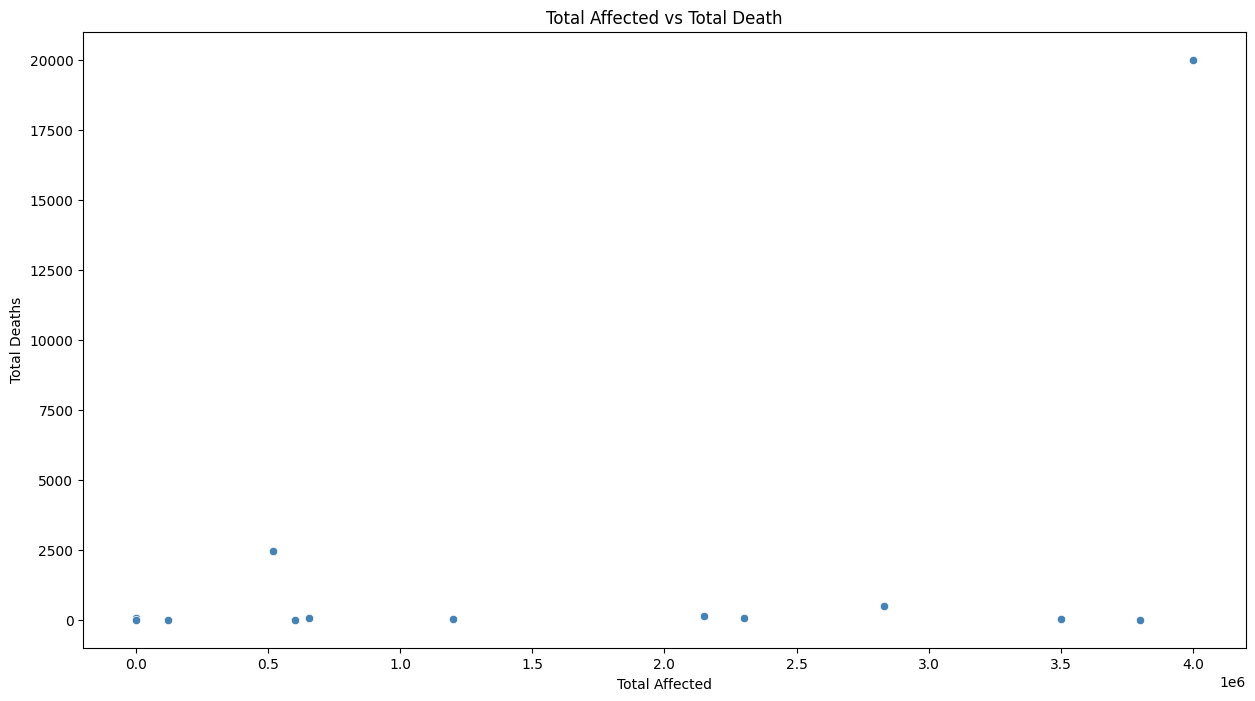

In [307]:
#scatter plot for Total Affected and Total Death
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Total Affected', y="Total Deaths", color='steelblue')
plt.title('Total Affected vs Total Death')
plt.xlabel('Total Affected')
plt.ylabel('Total Deaths')
plt.show()

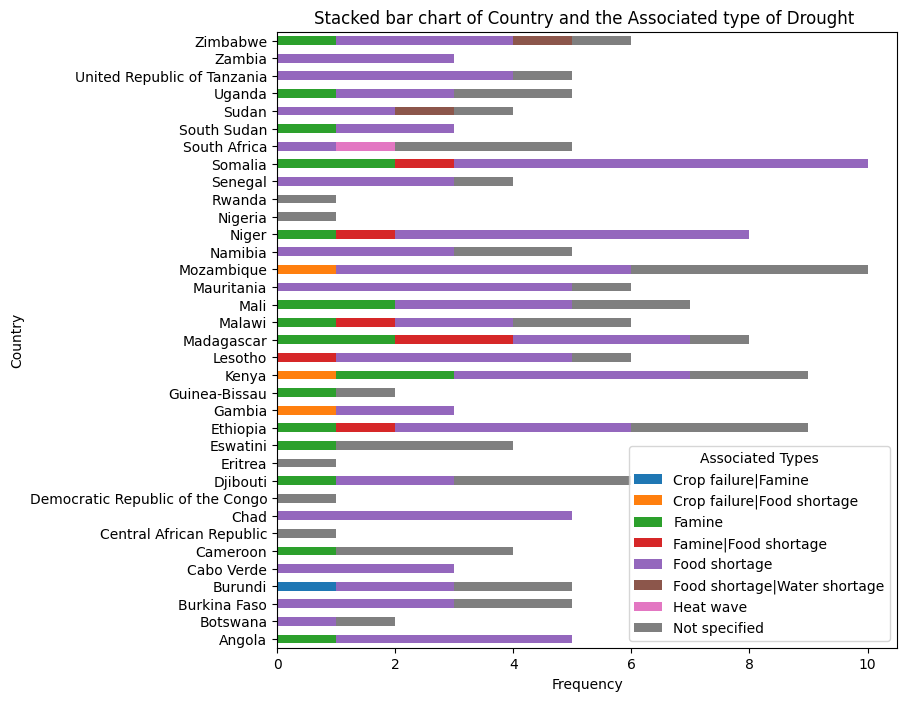

In [308]:
#Country and frequency of Associated Type of disaster
_ = pd.crosstab( df['Country'],df['Associated Types'])
_.plot(kind="barh", stacked=True, rot=0, figsize=(8, 8) )
plt.title('Stacked bar chart of Country and the Associated type of Drought ')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()


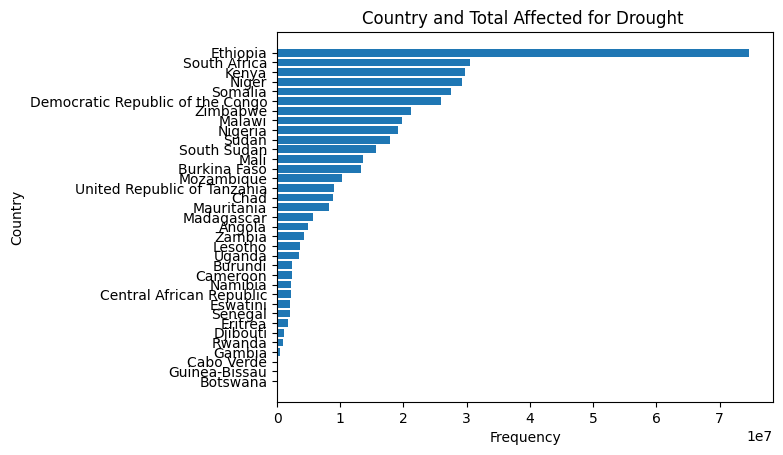

In [309]:
#barchart to show the Total Affected by disaster
country_with_high_affected = df.groupby('Country')[['Country', "Total Affected"]].sum()\
.sort_values(by="Total Affected").reset_index()
plt.barh(country_with_high_affected['Country'], country_with_high_affected['Total Affected'])
##country_with_high_affected.plot(kind="barh", figsize=(8, 8) )
plt.title('Country and Total Affected for Drought ')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

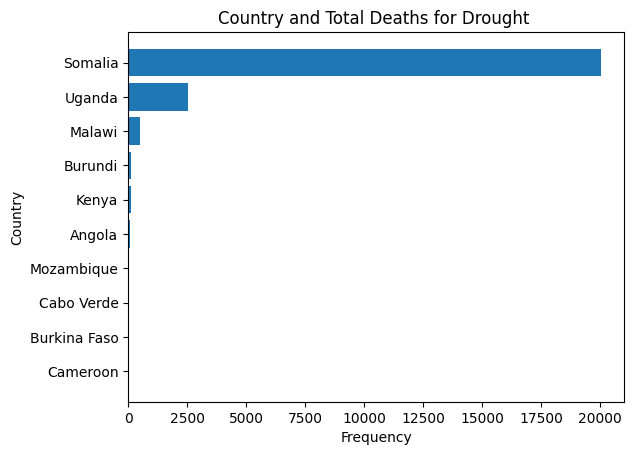

In [310]:
#barchart to show the Total Deaths caused by disaster
country_with_high_death = df.groupby('Country')[['Country', "Total Deaths"]].sum()\
.sort_values(by="Total Deaths", ascending=True).reset_index().tail(10)
plt.barh(country_with_high_death['Country'], country_with_high_death['Total Deaths'])
##country_with_high_affected.plot(kind="barh", figsize=(8, 8) )
plt.title('Country and Total Deaths for Drought ')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

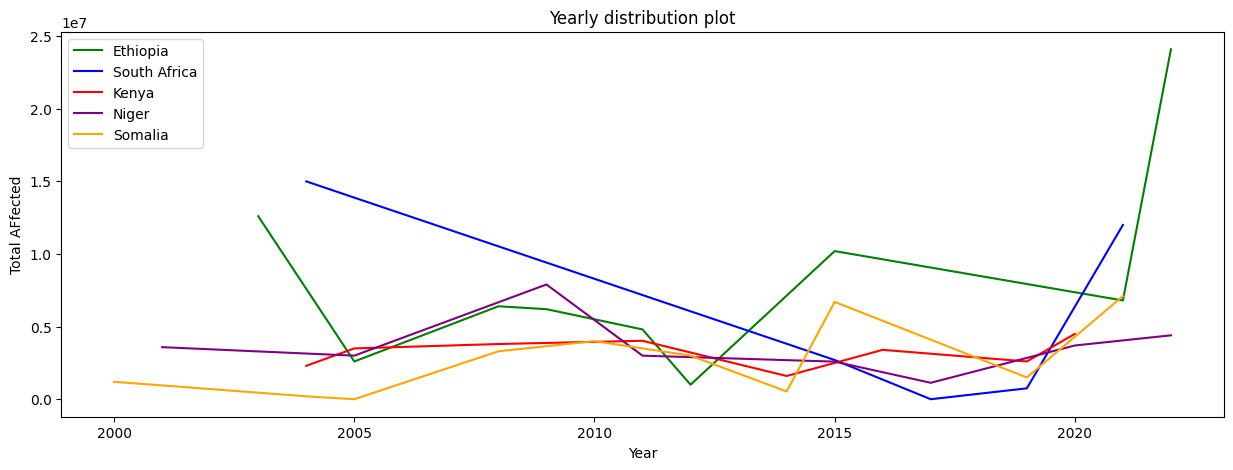

In [311]:
#Yearly trend of drought occurence for top 5 hits

plt.figure(figsize=(15,5))
#df[['Start Year','Total Deaths']].set_index('Start Year').plot()
sns.lineplot(data=df[df['Country'] == 'Ethiopia'], x='Start Year', y='Total Affected', errorbar=None,color='green' )
sns.lineplot(data=df[df['Country'] == 'South Africa'], x='Start Year', y='Total Affected', errorbar=None,color='blue')
sns.lineplot(data=df[df['Country'] == 'Kenya'], x='Start Year', y='Total Affected', errorbar=None, color='red')
sns.lineplot(data=df[df['Country'] == 'Niger'], x='Start Year', y='Total Affected', errorbar=None, color='purple')
sns.lineplot(data=df[df['Country'] == 'Somalia'], x='Start Year', y='Total Affected', errorbar=None, color='orange')
plt.legend(labels=['Ethiopia', 'South Africa', 'Kenya', 'Niger', 'Somalia'])
plt.title('Yearly distribution plot')
plt.xlabel('Year')
plt.ylabel('Total AFfected')
plt.show()

